# 2.3 Feature Selection

1. Use Feature Importance (Random Forest / XGBoost feature importance scores) to 
rank variables.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report

In [58]:
df = pd.read_csv("../datasets/pre_final_data.csv")
df.head(10)

,Age,Gender,Chest Pain Type,Resting Blood Pressure,Cholesterol Level,Fasting Blood Sugar,Resting ECG,Maximum Heart Rate Achieved,Exercise Induced Angina,ST Depression,Slope,Number of Major Arteries,Thalassemia,Heart Disease Status
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,1
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0
5,56.0,1,2,120.0,236.0,0,0,178.0,0,0.8,1,0,3,0
6,62.0,0,4,140.0,268.0,0,2,160.0,0,3.6,3,2,3,1
7,57.0,0,4,120.0,354.0,0,0,163.0,1,0.6,1,0,3,0
8,63.0,1,4,130.0,254.0,0,2,147.0,0,1.4,2,1,7,1
9,53.0,1,4,140.0,203.0,1,2,155.0,1,3.1,3,0,7,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          303 non-null    float64
 1   Gender                       303 non-null    int64  
 2   Chest Pain Type              303 non-null    int64  
 3   Resting Blood Pressure       303 non-null    float64
 4   Cholesterol Level            303 non-null    float64
 5   Fasting Blood Sugar          303 non-null    int64  
 6   Resting ECG                  303 non-null    int64  
 7   Maximum Heart Rate Achieved  303 non-null    float64
 8   Exercise Induced Angina      303 non-null    int64  
 9   ST Depression                303 non-null    float64
 10  Slope                        303 non-null    int64  
 11  Number of Major Arteries     303 non-null    int64  
 12  Thalassemia                  303 non-null    int64  
 13  Heart Disease Status

# Steps to Get Feature Importance using Random Forest

## 1. Prepare the Data
- Make sure the data is clean.
- Handle missing values.
- Convert text data to numbers if needed (Encoding).

## 2. Separate Features and Target
- `X` = all features (independent variables).
- `y` = target column (dependent variable).

## 3. Split the Data
- Use `train_test_split` to split data into training and testing sets (for example, 80% training, 20% testing).

## 4. Create and Train Random Forest Model
- Set the number of trees with `n_estimators`.
- Use `random_state` to make results reproducible.

## 5. Make Predictions and Evaluate the Model
- Use `.predict()` to make predictions on test data.
- Check model accuracy with `accuracy_score`.
- Get classification report with `classification_report`.

## 6. Get Feature Importance
- Use `.feature_importances_` to get importance scores for each feature.

## 7. Sort Features by Importance
- Use `np.argsort()` to get features sorted from most to least important.

## 8. Show the Results
- Print the most important features with their scores.
- Draw a bar chart to visualize feature importance.

## Note:
- You can use the same steps with other tree-based models like:
  - `DecisionTreeClassifier`
  - `ExtraTreesClassifier`
  - `GradientBoostingClassifier`


In [60]:
## 2. Separate Features and Target
X = df.drop("Heart Disease Status", axis=1)
y = df["Heart Disease Status"]

print("X Dataset shape:", X.shape)
print("y Dataset shape:", y.shape)

X Dataset shape: (303, 13)
y Dataset shape: (303,)


In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train Dataset shape:", X_train.shape)
print("y_train Dataset shape:", y_train.shape)
print("X_test Dataset shape:", X_test.shape)
print("y_test Dataset shape:", y_test.shape)

X_train Dataset shape: (242, 13)
y_train Dataset shape: (242,)
X_test Dataset shape: (61, 13)
y_test Dataset shape: (61,)


Random Forest Results:
Accuracy: 0.9016

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.87      0.93      0.90        28

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



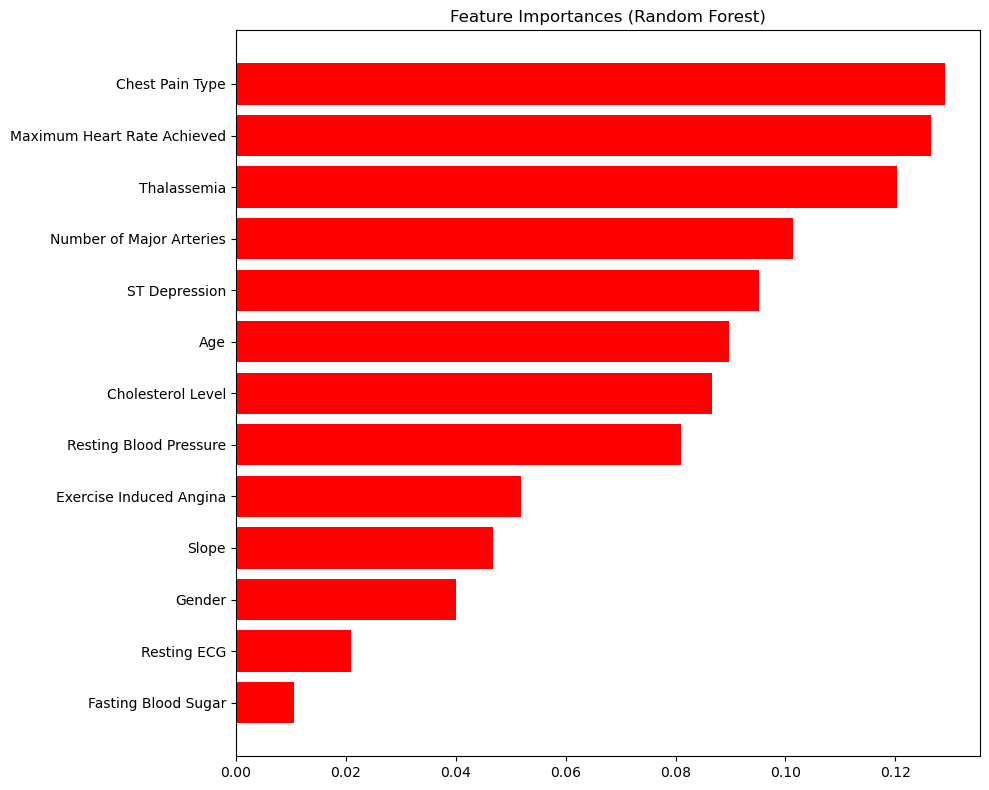

In [63]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_RF = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_RF):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_RF))

# Plot feature importance as horizontal bar chart
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title("Feature Importances (Random Forest)")
plt.barh(range(13), importances[indices[:13]], color="r")
plt.yticks(range(13), [X.columns[i] for i in indices[:13]])
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()


# Feature Importance using XGBoost feature importance scores

Probabilities for first 5 samples:
 [[2.0038587e-01 7.9961413e-01]
 [6.4044476e-01 3.5955527e-01]
 [9.9909675e-01 9.0323680e-04]
 [9.9865252e-01 1.3474880e-03]
 [5.8792490e-01 4.1207510e-01]]
XGBoost Results:
Accuracy: 0.8525

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        33
           1       0.79      0.93      0.85        28

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



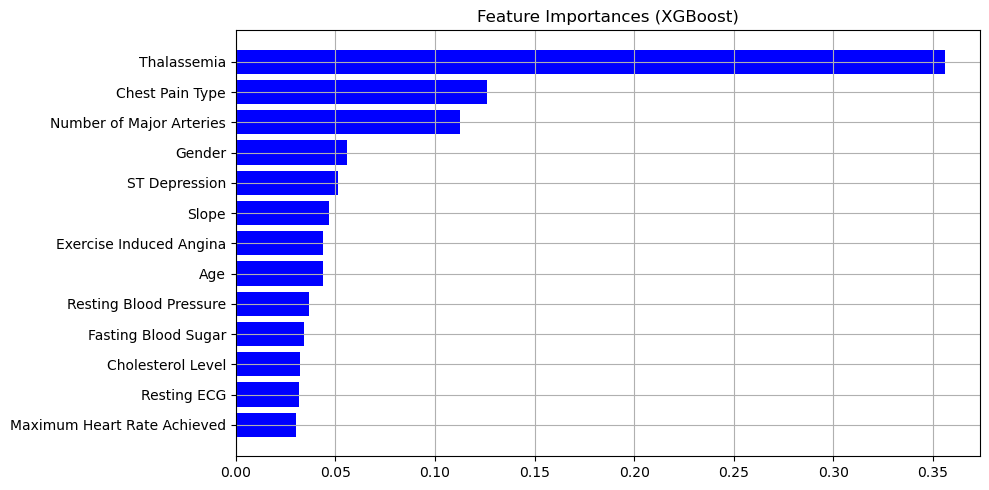

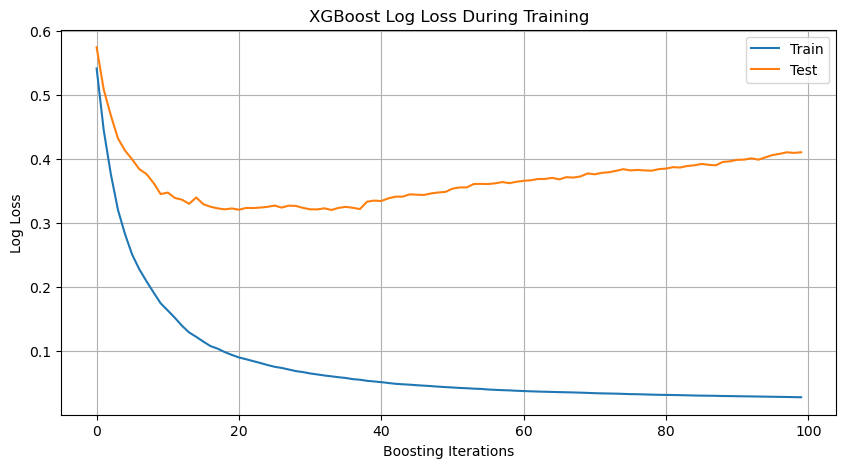

In [ ]:
eval_set = [(X_train, y_train), (X_test, y_test)]

# Creating an XGBoost model (Classifier)
xgb_model = xgb.XGBClassifier(eval_metric='logloss', 
                              random_state=42, 
                            )

# Model training
xgb_model.fit(
    X_train, y_train,
    eval_set=eval_set,
    verbose=False              # Displays the results of each round (if you want to reduce printing, set it to False)
)
# Prediction on test data
y_pred_xgb = xgb_model.predict(X_test)


y_probs = xgb_model.predict_proba(X_test)  # Probability matrix for each category
print("Probabilities for first 5 samples:\n", y_probs[:5])

# Model evaluation
print("XGBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Extracting feature importance
importances = xgb_model.feature_importances_

# Ordering the features by descending importance
indices = np.argsort(importances)[::-1]

# Draw the top 20 features
plt.figure(figsize=(10, 5))
plt.title("Feature Importances (XGBoost)")
plt.barh(range(13), importances[indices][:13], color="b")
plt.yticks(range(13), [X_train.columns[i] for i in indices[:13]])
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.grid()
plt.show()


# Extracting evaluation results
results = xgb_model.evals_result()

# Performance curve drawing
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

plt.rcParams['figure.figsize'] = [10, 5]

plt.plot(x_axis, results['validation_0']['logloss'], label='Train')
plt.plot(x_axis, results['validation_1']['logloss'], label='Test')

plt.title('XGBoost Log Loss During Training')
plt.xlabel('Boosting Iterations')
plt.ylabel('Log Loss')
plt.legend()
plt.grid()

fig = plt.gcf()  # Get current figure handle
plt.show()

C:\Users\Soft\AppData\Local\Temp\ipykernel_27708\3805821579.py:7: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


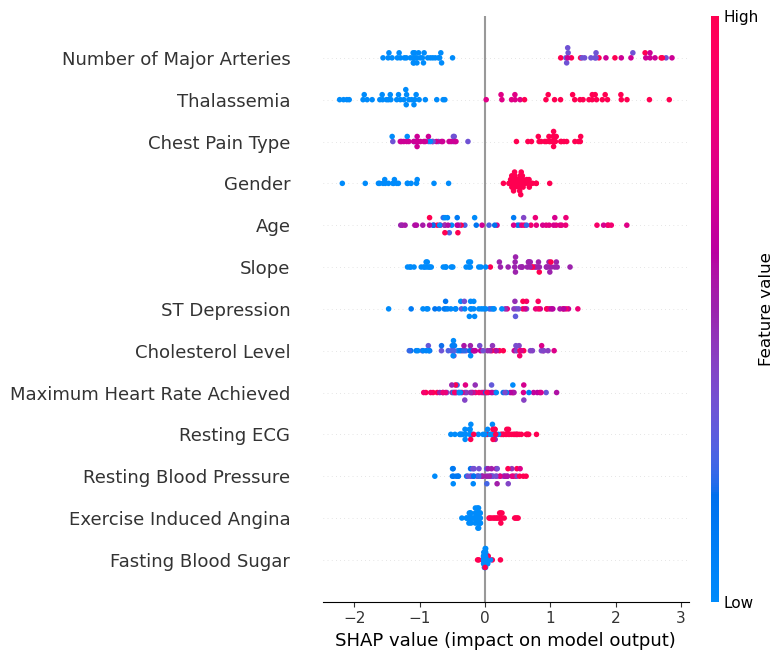

In [66]:
import shap

explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test)

### Notes to Explain the SHAP Summary Plot:

✅ **What is this plot?**  
This is a SHAP summary plot that explains the impact of each feature on the model's predictions.

---

✅ **How to read it?**  

- The **Y-axis** shows the features, ranked from the most important (top) to the least important (bottom).
- The **X-axis** shows the SHAP value, which represents the impact of that feature on the model's output.  
  - Values on the right (positive) increase the prediction (more chance of heart disease).  
  - Values on the left (negative) decrease the prediction (less chance of heart disease).  

---

✅ **What do the colors mean?**  

- **Red dots**: High value for that feature.  
- **Blue dots**: Low value for that feature.  
- The color shows the feature's value for each individual sample in the dataset.

---

✅ **Example interpretation:**  
If most red dots for a feature are on the right → high values of that feature increase the chance of predicting heart disease.  
If most blue dots are on the right → low values increase the chance of predicting heart disease.

---

✅ **Why is this useful?**  
It helps you understand:  
- Which features the model relies on the most.  
- How different values of each feature push the prediction higher or lower.  

---


### Comparison Table: Feature Importances vs. SHAP Values in XGBoost

| Aspect                     | `.feature_importances_`                         | **SHAP Values**                                  |
|----------------------------|-------------------------------------------------|--------------------------------------------------|
| **What it measures**       | How much the feature is used in tree splits (importance based on model structure). | How much the feature actually contributes to pushing the prediction up or down (practical impact). |
| **Level of explanation**   | Global (general importance in model structure). | Global + Local (explains both overall and for each individual prediction). |
| **Mathematical approach**  | Based on internal metrics like `gain`, `weight`, `cover`. | Based on Shapley values from cooperative game theory. |
| **Can show feature direction?** | ❌ No (does not tell if high/low values increase prediction). | ✅ Yes (shows if high/low values increase or decrease prediction). |
| **Best for…**              | Quick general overview of feature usage.         | Deep understanding of model decisions and transparency. |
| **More reliable for interpretation?** | Moderate.                                 | High. SHAP is considered more trustworthy for model explanation. |
| **Handles feature interactions?** | Partially.                                | ✅ Yes, considers complex feature interactions. |
| **Visual tools**           | Bar plot of feature importance.                 | Summary plot, force plot, dependence plot, etc. |

---

✅ **Summary:**  
For simple understanding, `.feature_importances_` is useful, but for real, trusted model interpretation, SHAP is more powerful and recommended.



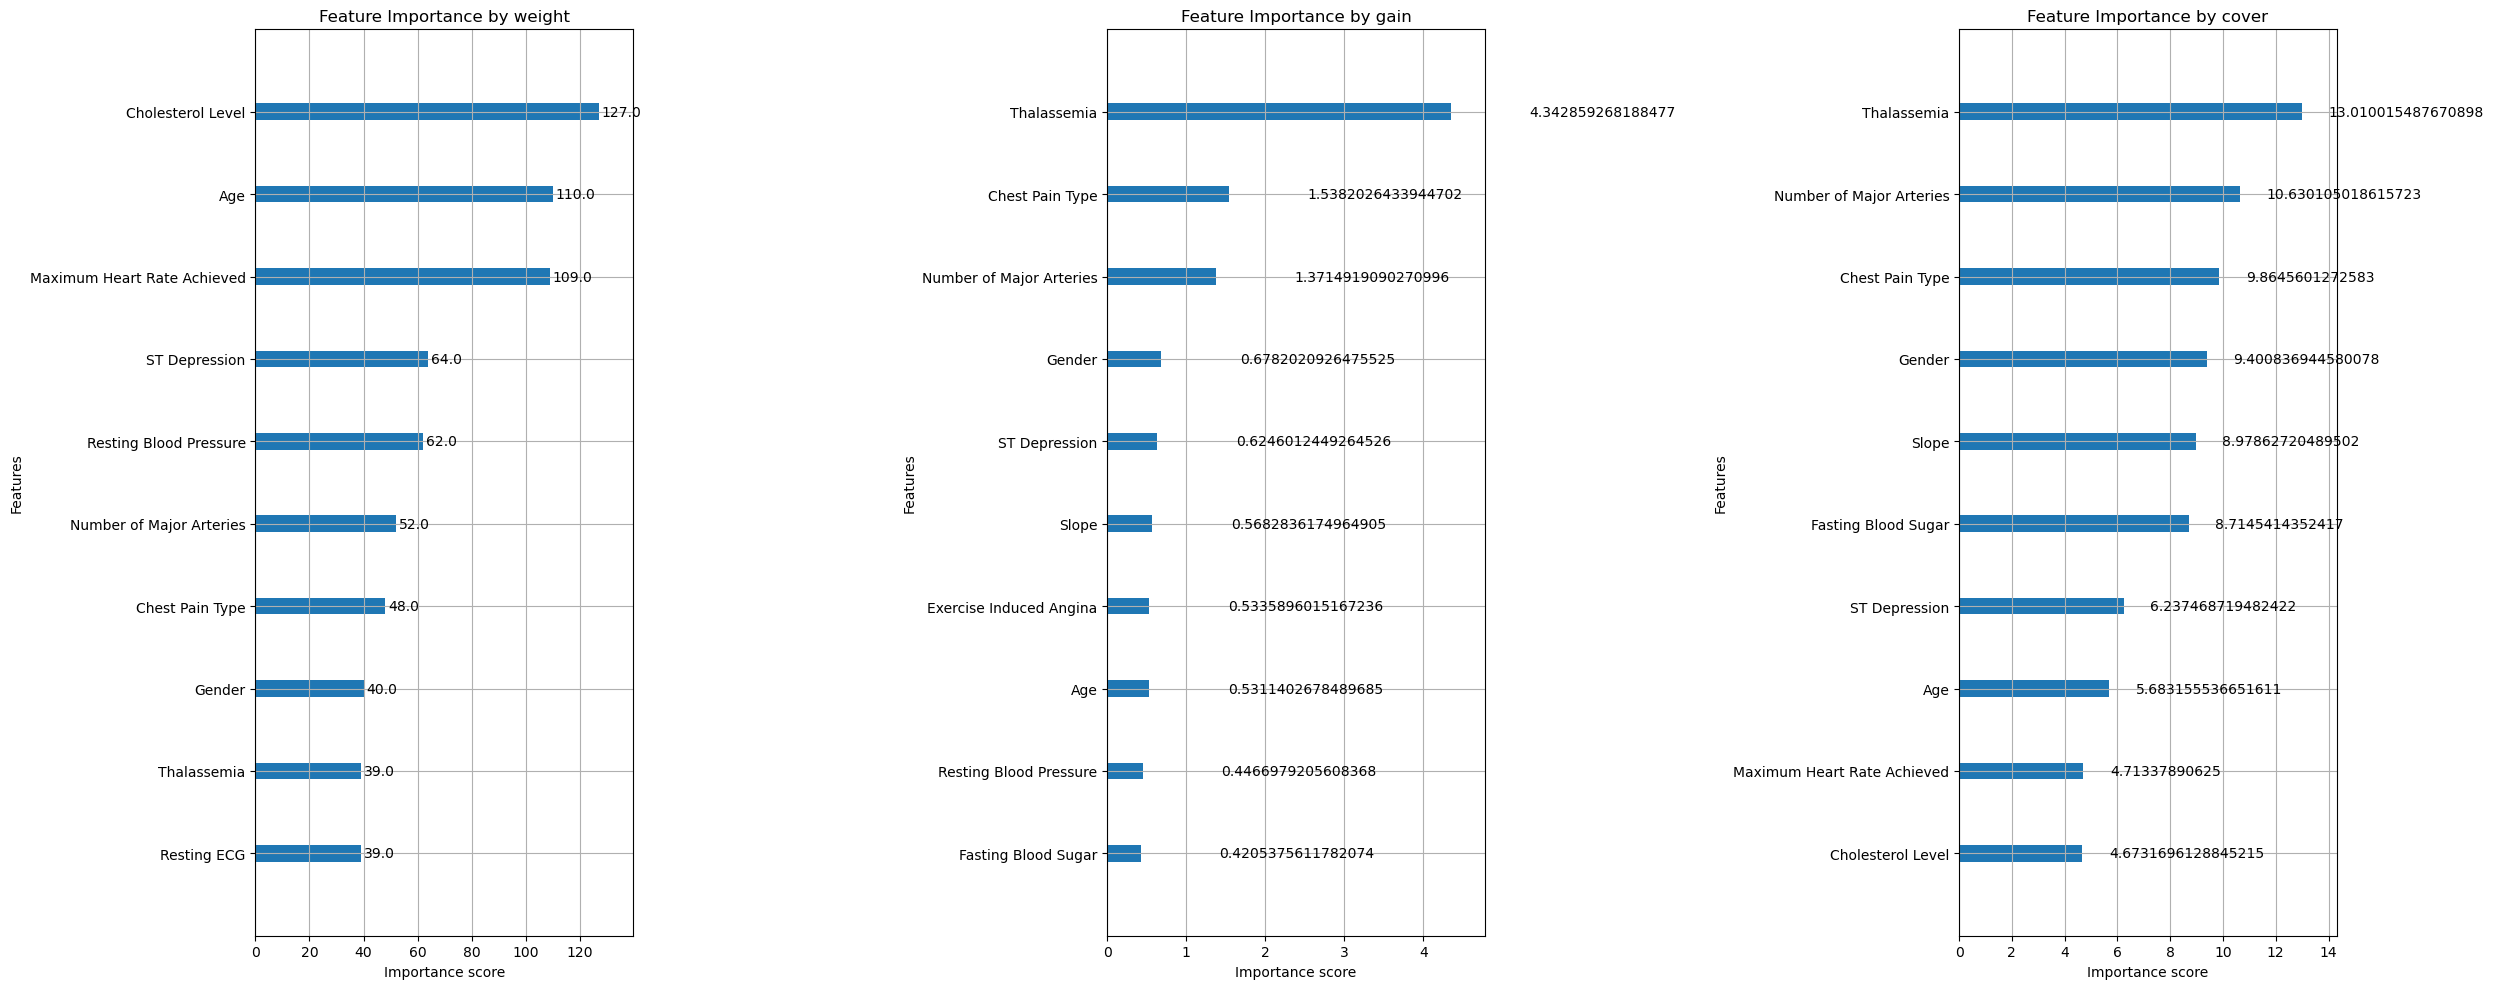

In [68]:
# Types of importance of characteristics: weight, gain, cover
importance_types = ['weight', 'gain', 'cover']

# Specify the size of the large shape and divide it into 1 row × 3 columns.
fig, axes = plt.subplots(1, 3, figsize=(25, 10))

# Draw each type of importance in a different subplot.
for idx, imp_type in enumerate(importance_types):
    xgb.plot_importance(xgb_model, importance_type=imp_type, max_num_features=10, ax=axes[idx])
    axes[idx].set_title(f'Feature Importance by {imp_type}')

# Improving the spaces between the drawings
plt.tight_layout()
plt.show()

### Notes for the 3 Types of Feature Importance (XGBoost)

This code displays **three different types of feature importance** for the XGBoost model. Each plot shows feature ranking based on a different internal metric used by XGBoost.

---

#### ✅ **Types of Feature Importance:**

| Type      | Meaning                                                       | Useful for                                    |
|-----------|---------------------------------------------------------------|------------------------------------------------|
| **weight** | The number of times a feature is used to split the trees.     | To see which features are frequently used in splits. |
| **gain**   | The average improvement in model performance when the feature is used in a split. | To understand which features truly boost model accuracy. |
| **cover**  | The number of samples affected by splits using that feature.  | To identify features that impact large portions of the dataset. |

---

#### ✅ **Why is this helpful?**

- It gives a more complete picture of feature importance, instead of relying on one single metric.
- A feature might appear in many splits (**high weight**) but not actually improve the model much (**low gain**).
- Another feature might appear rarely, but when it does, it significantly improves the model (**high gain**).
- The **cover** shows the scale of the feature's influence across the dataset.

---

#### ✅ **Summary:**

- Use **weight** for a simple view of feature usage frequency.
- Use **gain** to focus on features that truly improve the model.
- Use **cover** to see which features affect the most data points.
- Comparing all three gives a deeper, more reliable interpretation of the model.



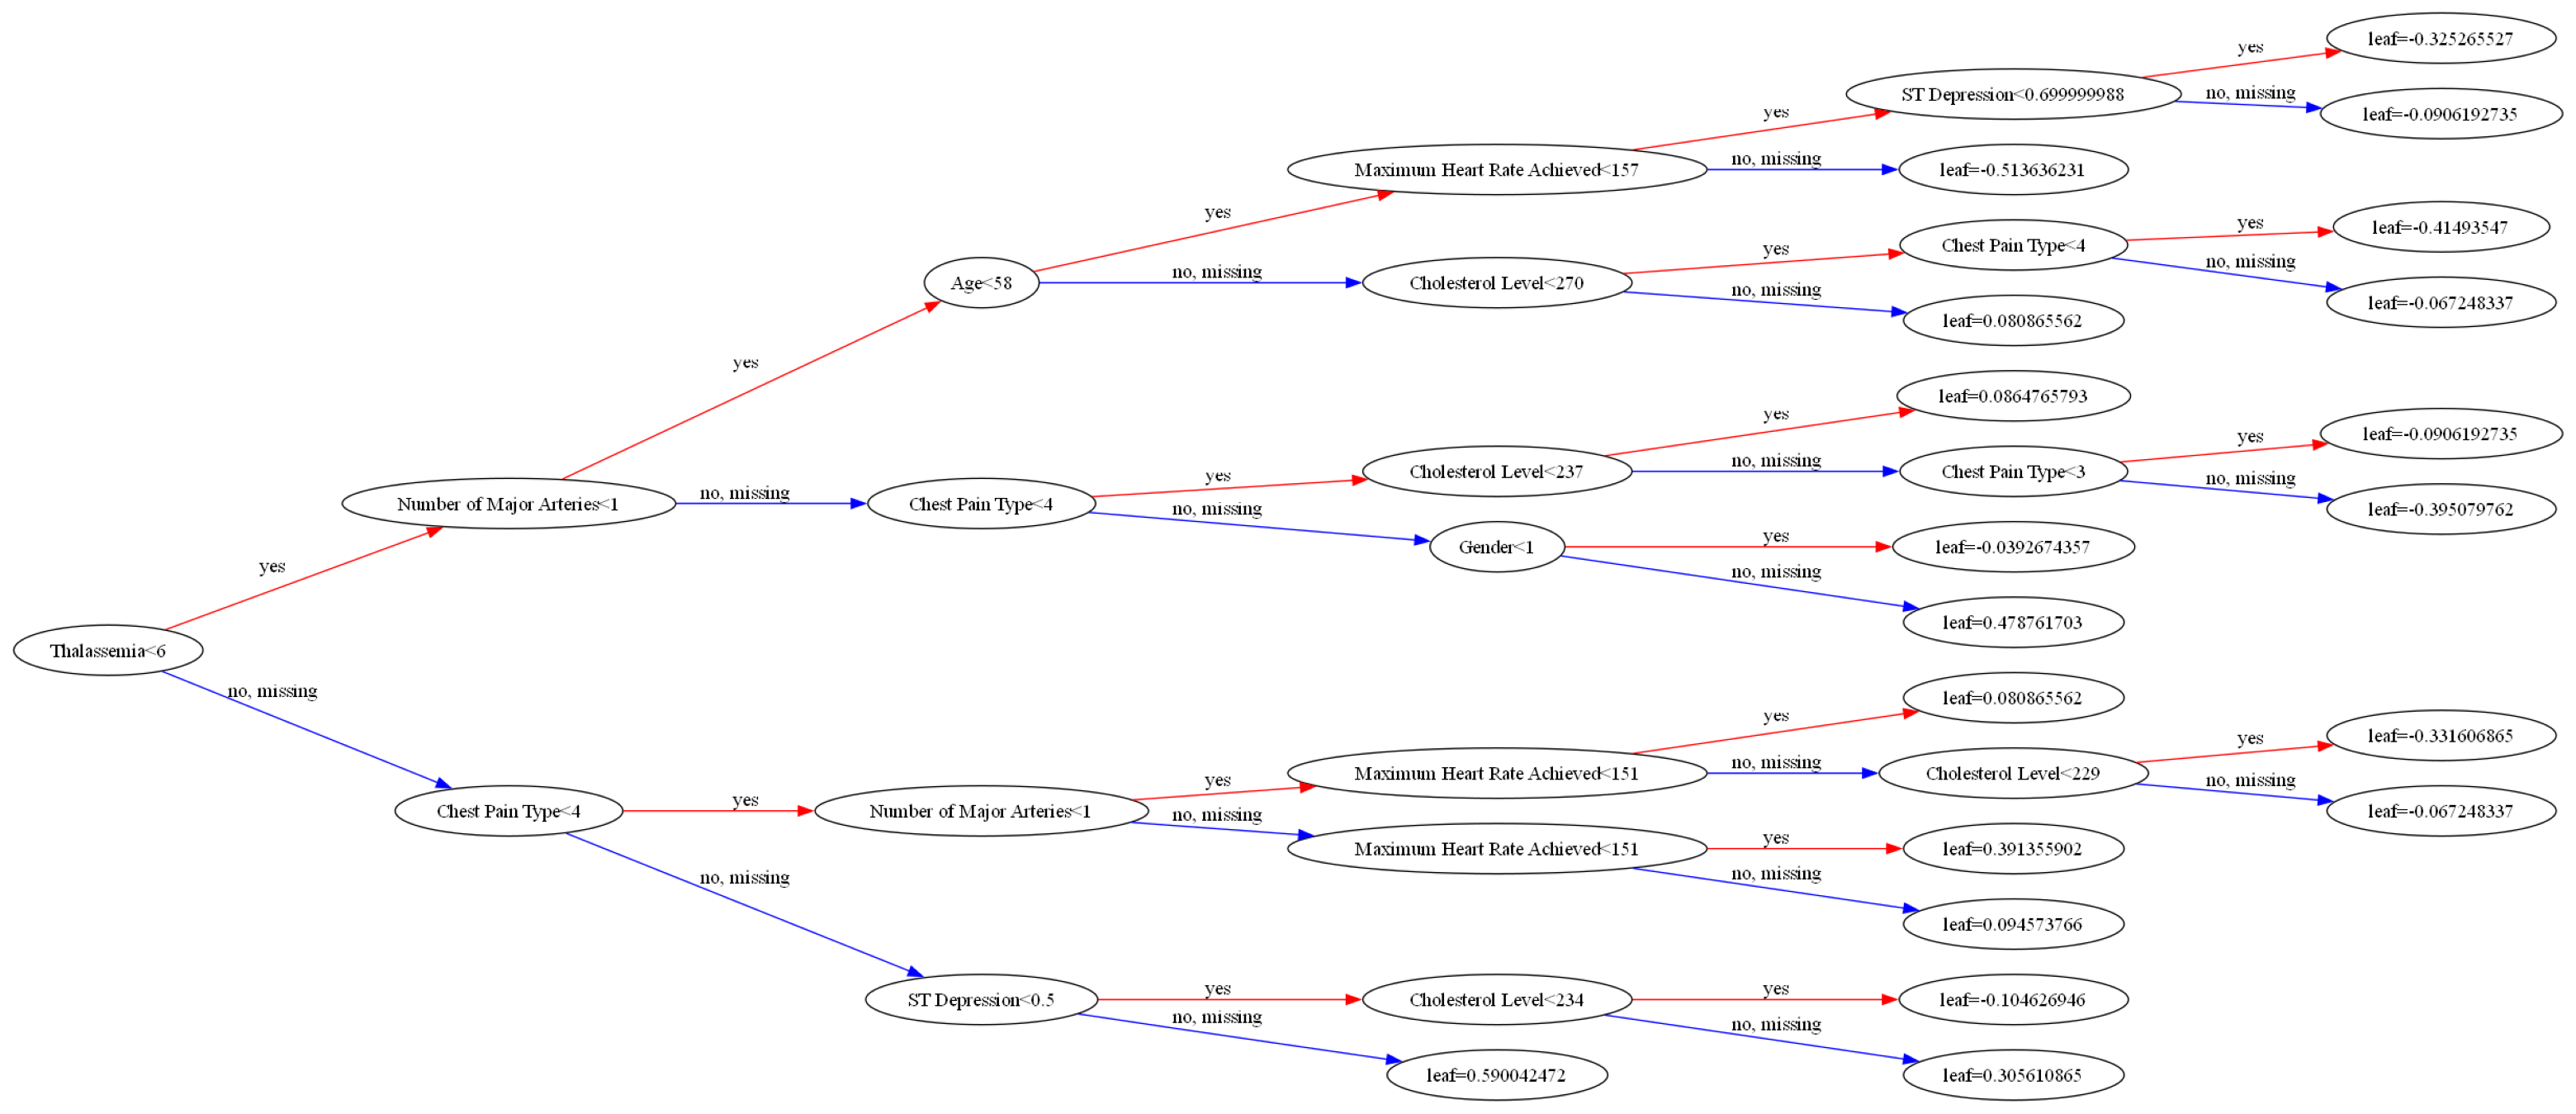

In [70]:
# Drawing the first tree in the model

# Determining the size of the shape before drawing
plt.rcParams['figure.figsize'] = [40, 25] 

# Draw the first tree horizontally.
ax = xgb.plot_tree(xgb_model, tree_idx=0, rankdir='LR')

# Save the shape in high quality
fig = ax.figure
fig.savefig('../tree_plot.png', dpi=800, bbox_inches='tight')  # Higher DPI makes the image clearer.

plt.show()

In [71]:
cv_results = xgb.cv(
    params={
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'seed': 42
    },
    dtrain=xgb.DMatrix(X_train, label=y_train),
    num_boost_round=100,
    nfold=5,
    metrics='logloss',
    early_stopping_rounds=10,
    as_pandas=True,
    seed=42
)

cv_results

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.538393,0.007530,0.592427,0.025467
1,0.442948,0.010021,0.550736,0.050569
2,0.375175,0.010618,0.518753,0.072838
3,0.323575,0.014097,0.502567,0.093784
4,0.283709,0.016696,0.490905,0.097749
5,0.253227,0.016285,0.488009,0.120003
6,0.228523,0.014333,0.475390,0.120485


# 2. Apply Recursive Feature Elimination (RFE) to select the best predictors. 

1. Apply Recursive Feature Elimination (RFE) to select the best predictors using RandomForest

In [81]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rfe = RFE(rf_model, n_features_to_select=10)

rfe.fit(X_train, y_train)

rf_selected_features = X_train.columns[rfe.support_]
print("Selected Features:", list(rf_selected_features))

rf_model.fit(X_train, y_train)

# The evaluation
y_pred = rf_model.predict(X_test)
print(f"\nAccuracy with Selected Features: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Selected Features: ['Age', 'Chest Pain Type', 'Resting Blood Pressure', 'Cholesterol Level', 'Maximum Heart Rate Achieved', 'Exercise Induced Angina', 'ST Depression', 'Slope', 'Number of Major Arteries', 'Thalassemia']

Accuracy with Selected Features: 0.9016

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.87      0.93      0.90        28

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



2. Apply Recursive Feature Elimination (RFE) to select the best predictors using XGBClassifier

In [86]:
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

rfe = RFE(xgb_model, n_features_to_select=10)

rfe.fit(X_train, y_train)

xgb_selected_features = X_train.columns[rfe.support_]
print("Selected Features:", list(xgb_selected_features))

X_train_selected = X_train[xgb_selected_features]
X_test_selected = X_test[xgb_selected_features]

# Retraining the model
xgb_model.fit(
    X_train_selected, y_train,
    eval_set=[(X_train_selected, y_train), (X_test_selected, y_test)],
    verbose=False
)

# The evaluation
y_pred = xgb_model.predict(X_test_selected)
print(f"\nAccuracy with Selected Features: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Selected Features: ['Age', 'Gender', 'Chest Pain Type', 'Resting Blood Pressure', 'Cholesterol Level', 'Exercise Induced Angina', 'ST Depression', 'Slope', 'Number of Major Arteries', 'Thalassemia']

Accuracy with Selected Features: 0.8689

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



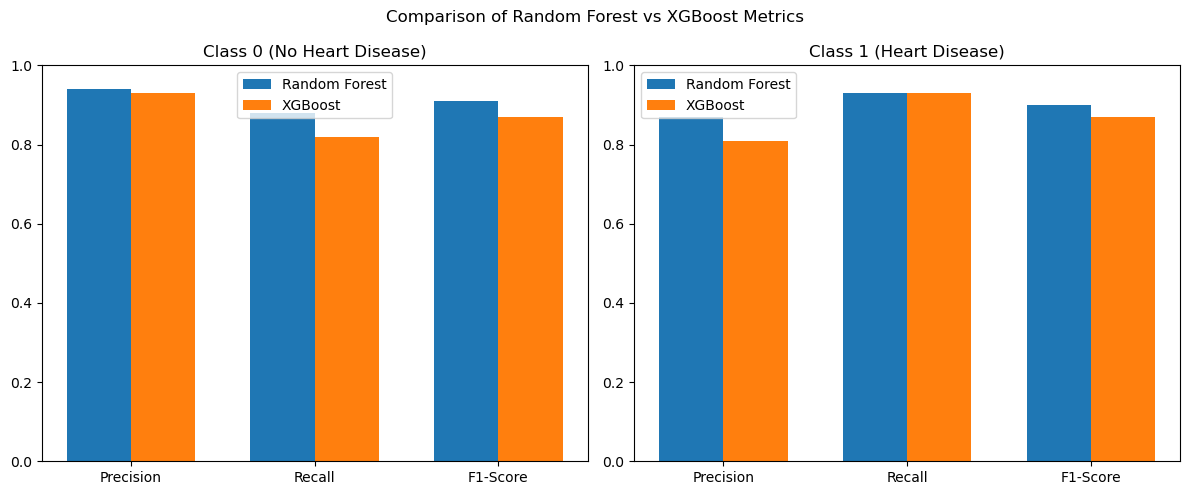

In [88]:
# The values from the reports that you presented.
metrics = ['Precision', 'Recall', 'F1-Score']

# For each category
class_0 = {'Random Forest': [0.94, 0.88, 0.91],'XGBoost': [0.93, 0.82, 0.87]}
class_1 = {'Random Forest': [0.87, 0.93, 0.90],'XGBoost': [0.81, 0.93, 0.87]}

x = np.arange(len(metrics))
width = 0.35

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Class 0
axes[0].bar(x - width/2, class_0['Random Forest'], width, label='Random Forest')
axes[0].bar(x + width/2, class_0['XGBoost'], width, label='XGBoost')
axes[0].set_title('Class 0 (No Heart Disease)')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics)
axes[0].set_ylim(0, 1)
axes[0].legend()

# Class 1
axes[1].bar(x - width/2, class_1['Random Forest'], width, label='Random Forest')
axes[1].bar(x + width/2, class_1['XGBoost'], width, label='XGBoost')
axes[1].set_title('Class 1 (Heart Disease)')
axes[1].set_xticks(x)
axes[1].set_xticklabels(metrics)
axes[1].set_ylim(0, 1)
axes[1].legend()

plt.suptitle('Comparison of Random Forest vs XGBoost Metrics')
plt.tight_layout()
plt.show()


In [92]:
selected_features = ['Age', 'Chest Pain Type', 'Resting Blood Pressure', 'Cholesterol Level',
                     'Maximum Heart Rate Achieved', 'Exercise Induced Angina', 'ST Depression',
                     'Slope', 'Number of Major Arteries', 'Thalassemia', 'Heart Disease Status']

final_df = df[selected_features]
final_df

,Age,Chest Pain Type,Resting Blood Pressure,Cholesterol Level,Maximum Heart Rate Achieved,Exercise Induced Angina,ST Depression,Slope,Number of Major Arteries,Thalassemia,Heart Disease Status
0,63.0,1,145.0,233.0,150.0,0,2.3,3,0,6,0
1,67.0,4,160.0,286.0,108.0,1,1.5,2,3,3,1
2,67.0,4,120.0,229.0,129.0,1,2.6,2,2,7,1
3,37.0,3,130.0,250.0,187.0,0,3.5,3,0,3,0
4,41.0,2,130.0,204.0,172.0,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1,110.0,264.0,132.0,0,1.2,2,0,7,1
299,68.0,4,144.0,193.0,141.0,0,3.4,2,2,7,1
300,57.0,4,130.0,131.0,115.0,1,1.2,2,1,7,1
301,57.0,2,130.0,236.0,174.0,0,0.0,2,1,3,1


# Save the final file (final_df) after removing the features that do not significantly affect the model's performance.


In [93]:
final_df.to_csv('../datasets/final_data.csv', index=False)